<a href="https://colab.research.google.com/github/onuralpArsln/MlAiTutorialProjects/blob/main/12-VideoSources/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresyon Nedir

Regresyon, istatistik ve makine √∂ƒüreniminde kullanƒ±lan bir tahmin y√∂ntemidir. Temel amacƒ±, baƒüƒ±msƒ±z deƒüi≈ükenler (girdiler) ile baƒüƒ±mlƒ± deƒüi≈üken (√ßƒ±ktƒ±) arasƒ±ndaki ili≈ükiyi modellemek ve bu ili≈ükiyi kullanarak yeni veriler i√ßin √ßƒ±ktƒ± deƒüerlerini tahmin etmektir. Regresyon, s√ºrekli deƒüerler (√∂rneƒüin, sƒ±caklƒ±k, fiyat, ya≈ü) tahmin etmek i√ßin kullanƒ±lƒ±r.

***Linear Regression***: Veriler arasƒ±ndaki doƒürusal ili≈ükiyi modelleyen temel regresyon t√ºr√ºd√ºr. Baƒüƒ±mlƒ± deƒüi≈üken, baƒüƒ±msƒ±z deƒüi≈ükenlerin bir doƒürusal kombinasyonu olarak tahmin edilir.

***Random Forest Regressor***: Bu model, √ßok sayƒ±da karar aƒüacƒ±ndan olu≈üur. Her bir aƒüa√ß, veri setinin farklƒ± alt k√ºmesiyle eƒüitilir ve nihai tahmin, aƒüa√ßlarƒ±n √ßoƒüunluk oylarƒ±yla belirlenir. Bu y√∂ntem, veri setindeki g√ºr√ºlt√ºye kar≈üƒ± daha dayanƒ±klƒ±dƒ±r ve modelin genelleme yeteneƒüini artƒ±rƒ±r. Ayrƒ±ca, farklƒ± aƒüa√ßlarƒ±n √∂ƒürenmesi birbirinden baƒüƒ±msƒ±z olduƒüu i√ßin, modelin doƒüruluƒüu genellikle tek bir aƒüa√ßtan daha iyidir.

***SVR (Support Vector Regression)***: Veri noktalarƒ±nƒ±n √ßoƒüunun bir hata payƒ± i√ßinde yer almasƒ±nƒ± ve sadece sƒ±nƒ±rdaki verilerin (destek vekt√∂rleri) modelin doƒüruluƒüunu etkileyebilmesini hedefler. Bu, a≈üƒ±rƒ± uyum yapmayƒ± √∂nler ve genellikle daha saƒülam tahminler elde edilmesini saƒülar.

# Gerekli K√ºt√ºphaneler

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Veri seti

Kaggleden aldƒ±ƒüƒ±mƒ±z bir veri seti kullanacaƒüƒ±z. veri seti linki https://www.kaggle.com/datasets/sohier/calcofi?select=bottle.csv

Bu su sƒ±caklƒ±ƒüƒ± ve su tuzluluƒüunun ili≈ükisini anlatan veri seti Kalforniyadan toplanan verilerden olu≈üur.


In [ ]:
!wget -q  https://raw.githubusercontent.com/onuralpArsln/MlAiTutorialProjects/refs/heads/main/12-VideoSources/CalCOFI_reduced.csv


Verilere ilk bakƒ±≈üƒ± yapalƒ±m

In [ ]:
#pandas kullanarak okuma yap
df = pd.read_csv("CalCOFI_reduced.csv")

# ƒ∞lk 5 satƒ±rƒ± yazdƒ±r
print(df.head())

# Veri setindeki s√ºtun isimlerini kontrol edelim
print(df.columns)

   Depthm  T_degC  Salnty
0       0   10.50  33.440
1       8   10.46  33.440
2      10   10.46  33.437
3      19   10.45  33.420
4      20   10.45  33.421
Index(['Depthm', 'T_degC', 'Salnty'], dtype='object')


Veri temizliƒüi i√ßin eksik veri varmƒ± bakalƒ±m eksik veri olan satƒ±rlarƒ± sileceƒüiz

In [ ]:
print(df.isnull().sum())

Depthm      0
T_degC    202
Salnty    875
dtype: int64


In [ ]:
df = df.dropna(subset=['Depthm', 'T_degC', 'Salnty'])


In [ ]:
print(df.isnull().sum())

Depthm    0
T_degC    0
Salnty    0
dtype: int64


# Isƒ± haritasƒ± ile hƒ±zlƒ± analiz

Bu ƒ±sƒ± haritasƒ± (heatmap) bize, su derinliƒüi, sƒ±caklƒ±k ve tuzluluk arasƒ±ndaki ili≈ükiyi g√∂sterir. 1‚Äôe yakƒ±n korelasyonlar g√º√ßl√º ili≈üki olduƒüunu, -1‚Äôe yakƒ±n olanlar ise negatif ili≈üki olduƒüunu g√∂sterir.

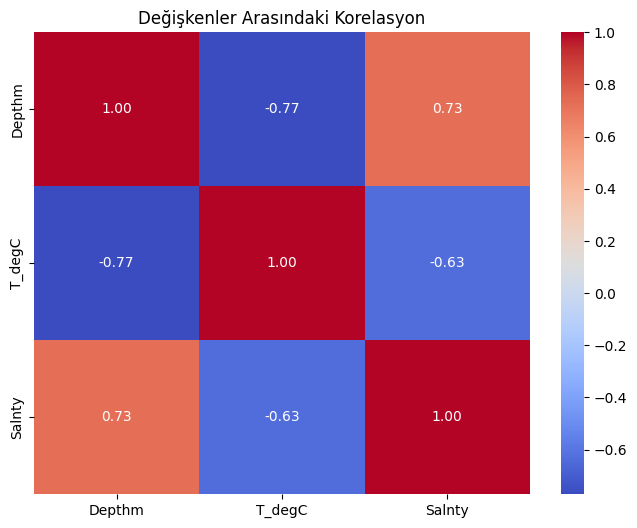

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Depthm', 'T_degC', 'Salnty']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Deƒüi≈ükenler Arasƒ±ndaki Korelasyon")
plt.show()

# Veri Noktalarƒ± ƒ∞le Analiz

ƒ∞ki eksende verilerimizin daƒüƒ±lƒ±mlarƒ±nƒ± g√∂rmek i√ßin scatterplot kullanƒ±mƒ±

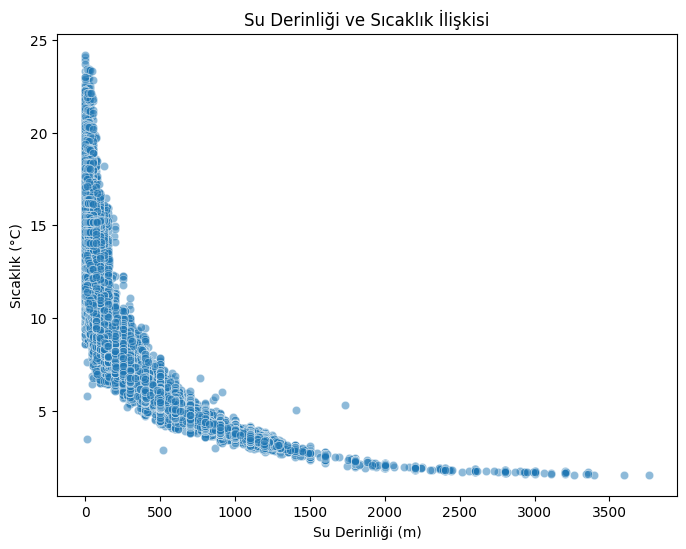

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Depthm'], y=df['T_degC'], alpha=0.5)
plt.xlabel("Su Derinliƒüi (m)")
plt.ylabel("Sƒ±caklƒ±k (¬∞C)")
plt.title("Su Derinliƒüi ve Sƒ±caklƒ±k ƒ∞li≈ükisi")
plt.show()

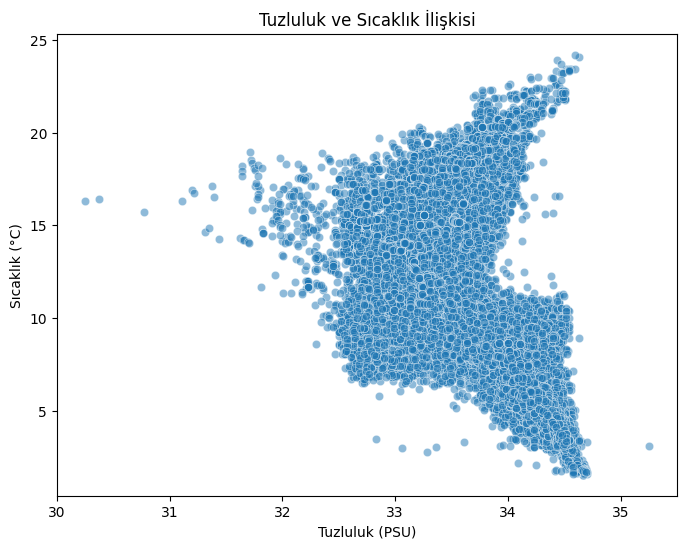

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Salnty'], y=df['T_degC'], alpha=0.5)
plt.xlabel("Tuzluluk (Practical Salinity Unit)")
plt.ylabel("Sƒ±caklƒ±k (¬∞C)")
plt.title("Tuzluluk ve Sƒ±caklƒ±k ƒ∞li≈ükisi")
plt.show()

# psu 0 saf su

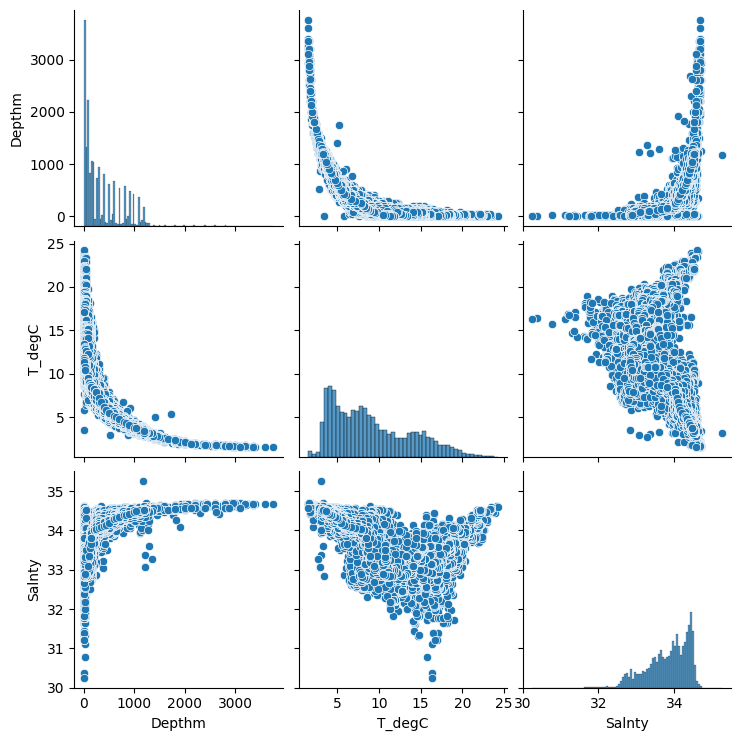

In [ ]:
#Farklƒ± grafikleri hƒ±zlƒ± hƒ±zlƒ± g√∂stermek
sns.pairplot(df[['Depthm', 'T_degC', 'Salnty']])
plt.show()

# Bir Regresyon modeli olu≈üturmak

Amacƒ±mƒ±z verilen girdilere baƒülƒ± bir √ßƒ±ktƒ± tahmin etmek, mesela su tuzluluƒüu ve deinliƒüe baƒülƒ± olarak su sƒ±caklƒ±ƒüƒ± oranƒ± nedir?

In [ ]:
# Girdi ve √ßƒ±ktƒ± deƒüi≈ükenlerini tanƒ±mla
X = df[['Depthm', 'Salnty']]
y = df['T_degC']

Veriyi eƒüitim ve test seti i√ßin ayƒ±r

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Veriyi √∂l√ßekleyelim, burada ama√ß k√º√ß√ºk tuzluluk deƒüi≈üimi olan (mesela 30 33 psu) bir aralƒ±kta sayƒ±sal olarak derinlik deƒüi≈üimi √ßok olabilir.Bu boyut farkƒ± (scale) modeli olumsuz etkiler amacƒ±mƒ±z aralƒ±klarƒ±n etkisini bir birine yakla≈ütƒ±rmak.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

farklƒ± model kullanacak ve kƒ±yaslacaƒüƒ±z bunlar i√ßin modellerden olu≈üan bir dict yapƒ±sƒ± kullandƒ±k

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100),
    "SVR": SVR(kernel='rbf', C=1)
}


Modelleri Eƒüit

In [ ]:
results = {}
for name, model in models.items():

    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Performans √∂l√ß√ºmleri
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {"RMSE": rmse, "R¬≤": r2}

R¬≤ (Determination Coefficient): Modelin ne kadar iyi tahmin yaptƒ±ƒüƒ±nƒ± g√∂sterir. 1'e yakƒ±nsa iyi bir modeldir.   
RMSE: Hata oranlarƒ±nƒ± g√∂sterir. D√º≈ü√ºk olmalƒ±dƒ±r.

Sonu√ßlarƒ± g√∂relim

Linear Regression: RMSE = 2.86, R¬≤ = 0.61
Random Forest Regressor: RMSE = 1.68, R¬≤ = 0.86
SVR: RMSE = 1.56, R¬≤ = 0.88

üèÖ En iyi model: SVR


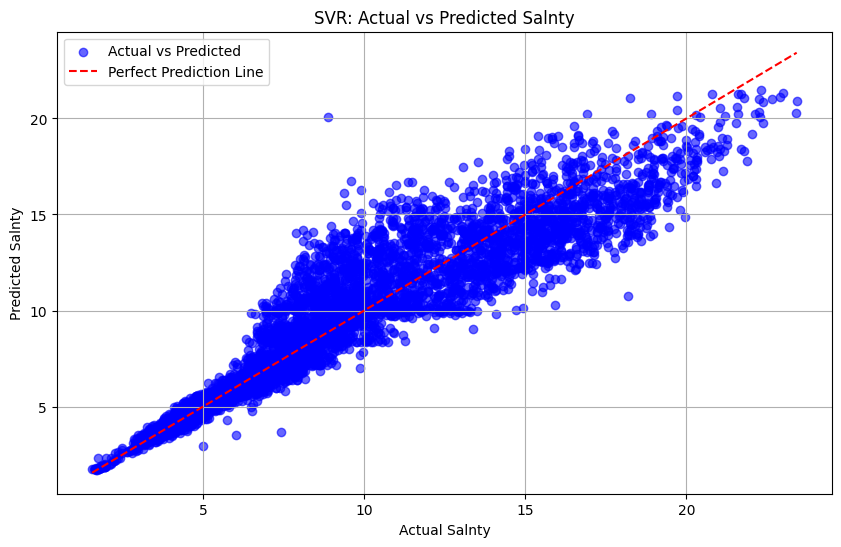

In [ ]:
# Sonu√ßlarƒ± g√∂ster
for model, metrics in results.items():
    print(f"{model}: RMSE = {metrics['RMSE']:.2f}, R¬≤ = {metrics['R¬≤']:.2f}")

# En iyi modeli se√ßip g√∂rselle≈ütirelim
best_model = max(results, key=lambda x: results[x]['R¬≤'])
print(f"\nüèÖ En iyi model: {best_model}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual Salnty')
plt.ylabel('Predicted Salnty')
plt.legend()
plt.title(f'{best_model}: Actual vs Predicted Salnty')
plt.grid(True)
plt.show()
